In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
Data = pd.read_csv('C:\\Users\\Mazz Mirza\\Mazz\\Study\\Datasets\\insurance.csv')

In [ ]:
# This data is used to predict insurance premium charges based on age,gender, body mass index, number of children, 
#if the person is a smoker or not, and region 

In [3]:
Data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


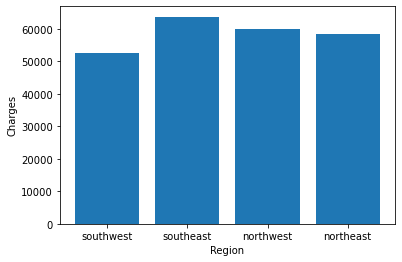

In [20]:
plt.bar(Data.region,Data.charges)
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

In [ ]:
#region is not contributing much towards dependent variable as charges are the almost the same for all four categories

In [21]:
Data.drop('region',axis=1,inplace=True)

<IPython.core.display.Javascript object>


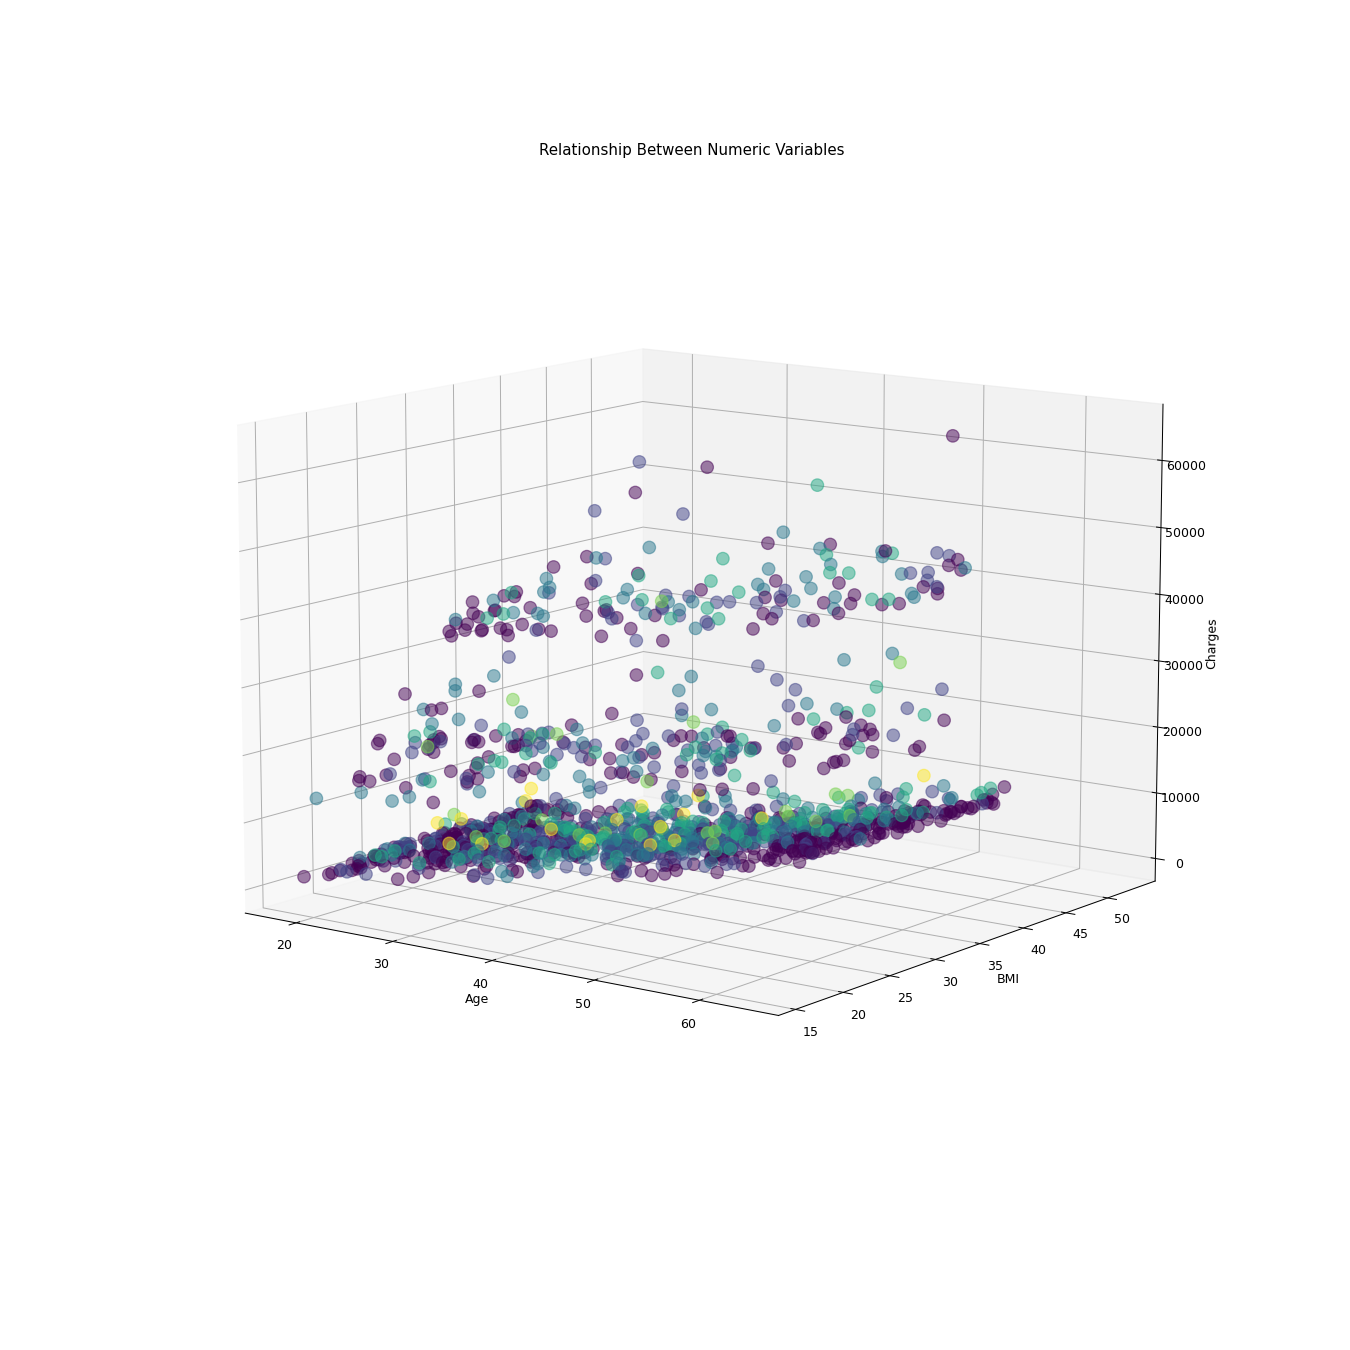

In [51]:
%matplotlib notebook
fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection="3d")
ax.scatter3D(Data["age"],Data['bmi'],Data['charges'],c=Data['children'],alpha=0.5,s = 100)
ax.set_xlabel('Age',size = 10)
ax.set_ylabel('BMI',size = 10)
ax.set_zlabel('Charges',size = 10)
ax.set_title('Relationship Between Numeric Variables')
plt.show()

In [41]:
# encolding categorical variables
from sklearn.preprocessing import LabelEncoder

In [42]:
LE = LabelEncoder()

In [43]:
Data['sex'] = LE.fit_transform(Data['sex'])

In [44]:
Data['smoker'] = LE.fit_transform(Data['smoker'])

In [45]:
Data.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [ ]:
# Let's split into train and test

In [52]:
y = Data.pop('charges')
X = Data

In [54]:
y.shape,X.shape

((1338,), (1338, 5))

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.8,random_state=123)

In [58]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [62]:
print('y- intercept: ',regressor.intercept_)
print("Coefficients: ",regressor.coef_)

y- intercept:  -12639.230175846402
Coefficients:  [  254.04195997   293.85553825   356.73965814   236.86257793
 23121.72179328]


In [63]:
# predicting on test set
pred = regressor.predict(X_test)

In [64]:
from sklearn import metrics

In [66]:
print(f'Mean Absolute Error:{metrics.mean_absolute_error(y_test,pred)}')
print(f'Root Mean Absolute Error:{np.sqrt(metrics.mean_absolute_error(y_test,pred))}')

Mean Absolute Error:4250.088150024162
Root Mean Absolute Error:65.19270012834383


In [67]:
from sklearn.metrics import r2_score

In [69]:
R_squared = r2_score(y_test,pred)

In [70]:
print(f'Coefficient of determination:{R_squared}')

Coefficient of determination:0.7495187653626745
